# Genesis4 Beam files

In [1]:
import numpy as np
import h5py

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
slen = 15.0e-6

## Gamma array

In [3]:
gamma0 = 19174.0776

h = -15.0

xdata = np.linspace(0, slen, 20000)

ydata = gamma0 + (xdata - xdata.mean()) * h * 1e6 / 0.511

with h5py.File("beam_gamma.h5", "w") as file:
    file["s"] = xdata
    file["gamma"] = ydata

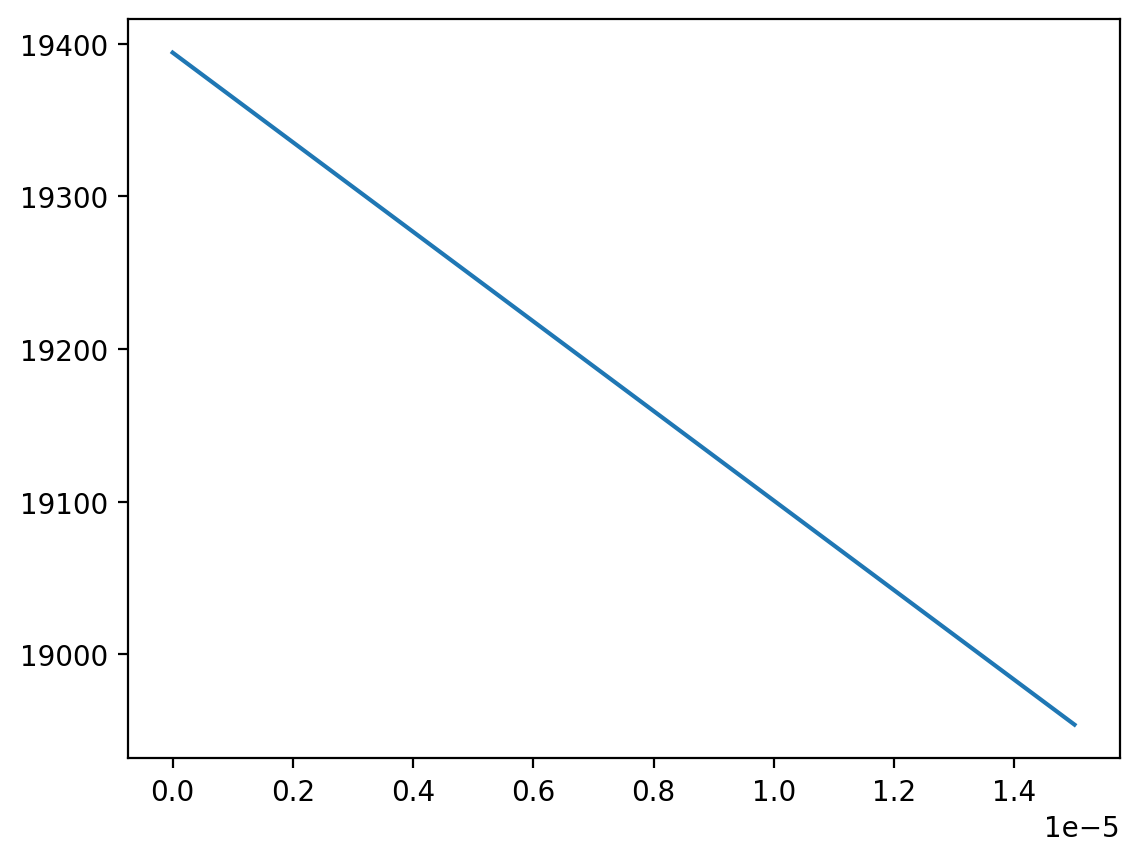

In [4]:
plt.plot(xdata, ydata)

## Current array

In [5]:
sigma_t = 2.0e-6
t0 = slen / 2.0

curr0 = 3000.0

xdata = np.linspace(0, slen, 20000)
ydata = curr0 * np.exp(-((xdata - t0) ** 2) / 2.0 / sigma_t**2)

with h5py.File("beam_current.h5", "w") as file:
    file["s"] = xdata
    file["current"] = ydata

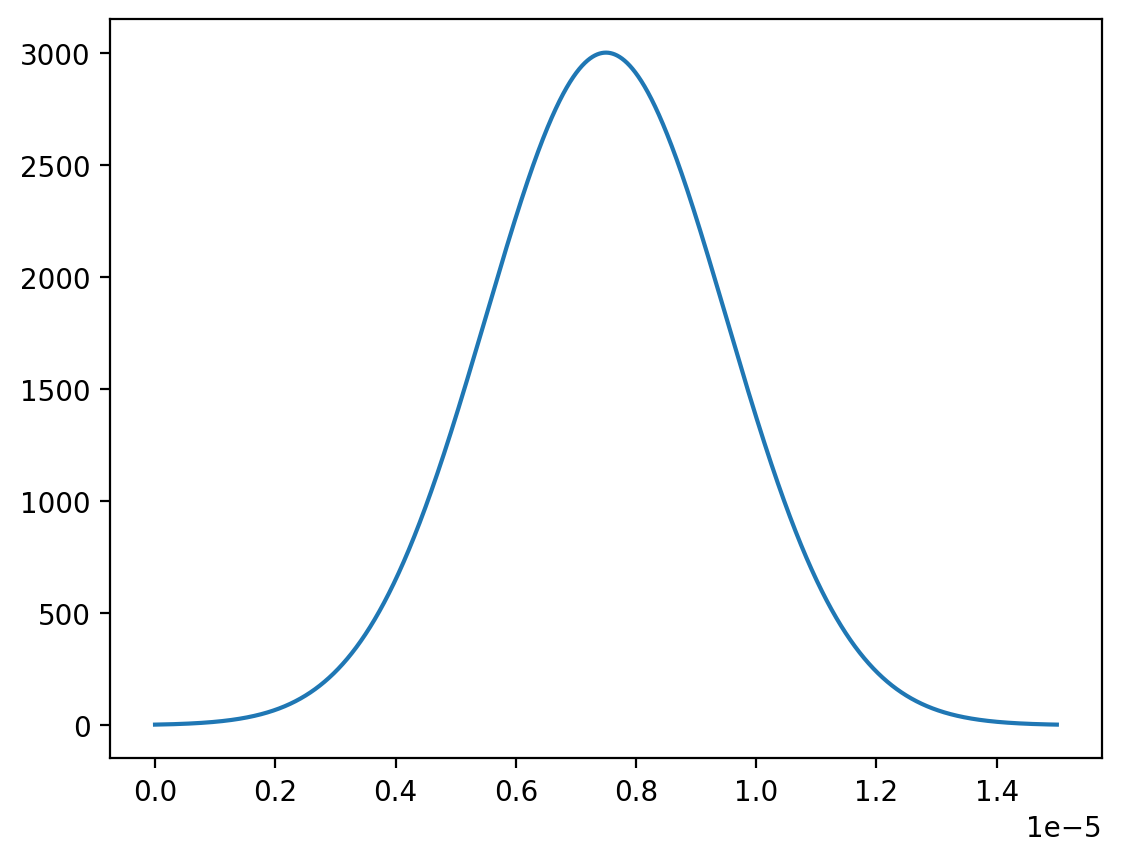

In [6]:
plt.plot(xdata, ydata)

# Resonance

`lambda0` in the input file has been adjusted to account for SASE detuning

In [7]:
# In input file
lambda0 = 1.3789244869952112e-10
gamma0 = 19174.0776
# lat file
lambdau = 0.026
aw = 1.7017

K = aw * np.sqrt(2)
lambda_res = lambdau / (2 * gamma0**2) * (1 + K**2 / 2)


lambda0, lambda_res, lambda_res / lambda0

(1.3789244869952112e-10, 1.3775556006924946e-10, 0.9990072797200813)